<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  Segmentación de Clientes con Clustering Jerárquico y DBSCAN

El objetivo de este caso-taller es analizar una base de datos ficticia sobre clientes de una tienda y buscar encontrar grupos de clientes que permitan generar estrategias de marketing focalizadas. La base se encuentra en los `Archivos de Laboratorio` en la carpeta `data` y cuenta con 200 observaciones y 5 variables:

- `Id_Cliente`: identificador de cliente.
- `Genero`: género del cliente: Mujer, Hombre
- `Edad`: edad en años
- `Ingreso`: ingresos anuales
- `Puntaje_Gasto`: es una variable que mide cuán a menudo un cliente compra en la tienda, siendo 100 el puntaje más alto.


## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo


### 1.Carga de datos 

En la carpeta `data` se encuentra el archivo `datos_clientes.csv` cargue estos datos en su *cuaderno*. 

In [38]:
# Librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configurar el estilo de las gráficas
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Cargar los datos
df = pd.read_csv('data/datos_clientes.csv')

# Mostrar información básica del dataset
print("Información del dataset:")
print(f"Dimensiones: {df.shape}")

Información del dataset:
Dimensiones: (200, 5)


In [39]:
print("\nPrimeras 5 filas:")
df.head()


Primeras 5 filas:


,Id_Cliente,Genero,Edad,Ingreso,Puntaje_Gasto
0,1,Mujer,41,98115.05,39
1,2,Mujer,20,35458.14,75
2,3,Mujer,68,59872.08,55
3,4,Hombre,63,48508.93,51
4,5,Mujer,31,44431.11,54


In [40]:
print("\nInformación de las columnas:")
df.info()


Información de las columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id_Cliente     200 non-null    int64  
 1   Genero         200 non-null    object 
 2   Edad           200 non-null    int64  
 3   Ingreso        200 non-null    float64
 4   Puntaje_Gasto  200 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 7.9+ KB


In [41]:
print("\nEstadísticas descriptivas:")
df.describe()


Estadísticas descriptivas:


,Id_Cliente,Edad,Ingreso,Puntaje_Gasto
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60624.446600,50.200000
std,57.879185,13.969007,26262.903416,25.823522
min,1.000000,18.000000,13458.020000,1.000000
25%,50.750000,28.750000,41512.787500,34.750000
50%,100.500000,36.000000,60777.960000,50.000000
75%,150.250000,49.000000,77143.865000,73.000000
max,200.000000,70.000000,138584.520000,99.000000


**Desarrollo:**

En esta primera sección, he procedido a cargar los datos del archivo CSV ubicado en la carpeta `data`. El procedimiento incluyó:

**Importación de librerías**: Se importaron todas las librerías necesarias para el análisis de clustering.

**Carga de datos**: Se cargó el dataset desde el archivo CSV y se realizó una exploración inicial que incluye:
   - Verificación de las dimensiones del dataset (200 filas × 5 columnas)
   - Visualización de las primeras filas para entender la estructura
   - Información sobre los tipos de datos y valores faltantes
   - Estadísticas descriptivas básicas

### 2. Análisis preliminar. 

Antes de comenzar el análisis de segmentación utilice estadísticas descriptivas para explorar la variables que se encuentran en los datos. En su análisis mencione si hay patrones que surgen del examen descriptivo de los datos; entre ellos si hay diferencias en los ingresos y los puntajes de gastos para mujeres y hombres, por grupos etarios (18-24, 25-34, 35-44, 45-54, 55-64, y 65+), y por grupos etarios y género. Discuta además si estas diferencias son estadísticamente significativas.

In [53]:
# Grupos por edad para ver mejor los patrones
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['Grupo_Etario'] = pd.cut(df['Edad'], bins=bins, labels=labels, right=False)

# Primero veo las diferencias por género
print("Estadísticas por género:")
genero_stats = df.groupby('Genero')[['Ingreso', 'Puntaje_Gasto']].agg(['mean', 'std'])
genero_stats

Estadísticas por género:


Ingreso               Puntaje_Gasto          
                mean           std          mean       std
Genero                                                    
Hombre  62126.660455  26765.492953     48.511364  27.89677
Mujer   59444.135714  25920.459216     51.526786  24.11495

In [54]:
# Grupos por edad para ver mejor los patrones
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['Grupo_Etario'] = pd.cut(df['Edad'], bins=bins, labels=labels, right=False)

# Diferencias por género
print("Estadísticas por género:")
genero_stats = df.groupby('Genero')[['Ingreso', 'Puntaje_Gasto']].agg(['mean', 'std'])
genero_stats

Estadísticas por género:


Ingreso               Puntaje_Gasto          
                mean           std          mean       std
Genero                                                    
Hombre  62126.660455  26765.492953     48.511364  27.89677
Mujer   59444.135714  25920.459216     51.526786  24.11495

In [56]:
# Grupos de edad
print("\nEstadísticas por grupo etario:")
edad_stats = df.groupby('Grupo_Etario')[['Ingreso', 'Puntaje_Gasto']].agg(['mean', 'std'])
edad_stats


Estadísticas por grupo etario:


Ingreso               Puntaje_Gasto           
                      mean           std          mean        std
Grupo_Etario                                                     
18-24         44454.795429  20378.208373     56.257143  24.659258
25-34         71157.328148  27885.788157     63.166667  24.283506
35-44         66957.096905  27722.049259     49.428571  30.700078
45-54         58786.491026  24276.268114     36.230769  16.261776
55-64         56357.093125  22351.828240     32.312500  21.752299
65+           51420.789286  12686.437083     46.714286  11.431593

In [57]:
# combinando
print("\nEstadísticas por género y edad:")
genero_edad_stats = df.groupby(['Genero', 'Grupo_Etario'])[['Ingreso', 'Puntaje_Gasto']].mean()
genero_edad_stats


Estadísticas por género y edad:


Ingreso  Puntaje_Gasto
Genero Grupo_Etario                             
Hombre 18-24         46748.482500      51.875000
       25-34         78927.434545      62.454545
       35-44         67001.986111      50.777778
       45-54         58029.127143      34.357143
       55-64         55780.227778      28.444444
       65+           51366.806667      46.000000
Mujer  18-24         42523.269474      59.947368
       25-34         65815.380000      63.656250
       35-44         66923.430000      48.416667
       45-54         59210.614800      37.280000
       55-64         57098.777143      37.285714
       65+           51517.958000      48.000000

In [46]:
from scipy import stats

# Separo hombres y mujeres
mujeres = df[df['Genero'] == 'Mujer']
hombres = df[df['Genero'] == 'Hombre']

# Prueba t para ver si hay diferencias por género
t_stat_ingreso, p_val_ingreso = stats.ttest_ind(mujeres['Ingreso'], hombres['Ingreso'])
print(f"\nPrueba t para ingresos por género:")
print(f"Valor p: {p_val_ingreso:.4f}")
if p_val_ingreso < 0.05:
    print("Hay diferencias significativas en ingresos entre géneros")
else:
    print("NO hay diferencias significativas en ingresos entre géneros")

t_stat_gasto, p_val_gasto = stats.ttest_ind(mujeres['Puntaje_Gasto'], hombres['Puntaje_Gasto'])
print(f"\nPrueba t para puntaje de gasto por género:")
print(f"Valor p: {p_val_gasto:.4f}")
if p_val_gasto < 0.05:
    print("Hay diferencias significativas en puntaje de gasto entre géneros")
else:
    print("NO hay diferencias significativas en puntaje de gasto entre géneros")


Prueba t para ingresos por género:
Valor p: 0.4747
NO hay diferencias significativas en ingresos entre géneros

Prueba t para puntaje de gasto por género:
Valor p: 0.4137
NO hay diferencias significativas en puntaje de gasto entre géneros


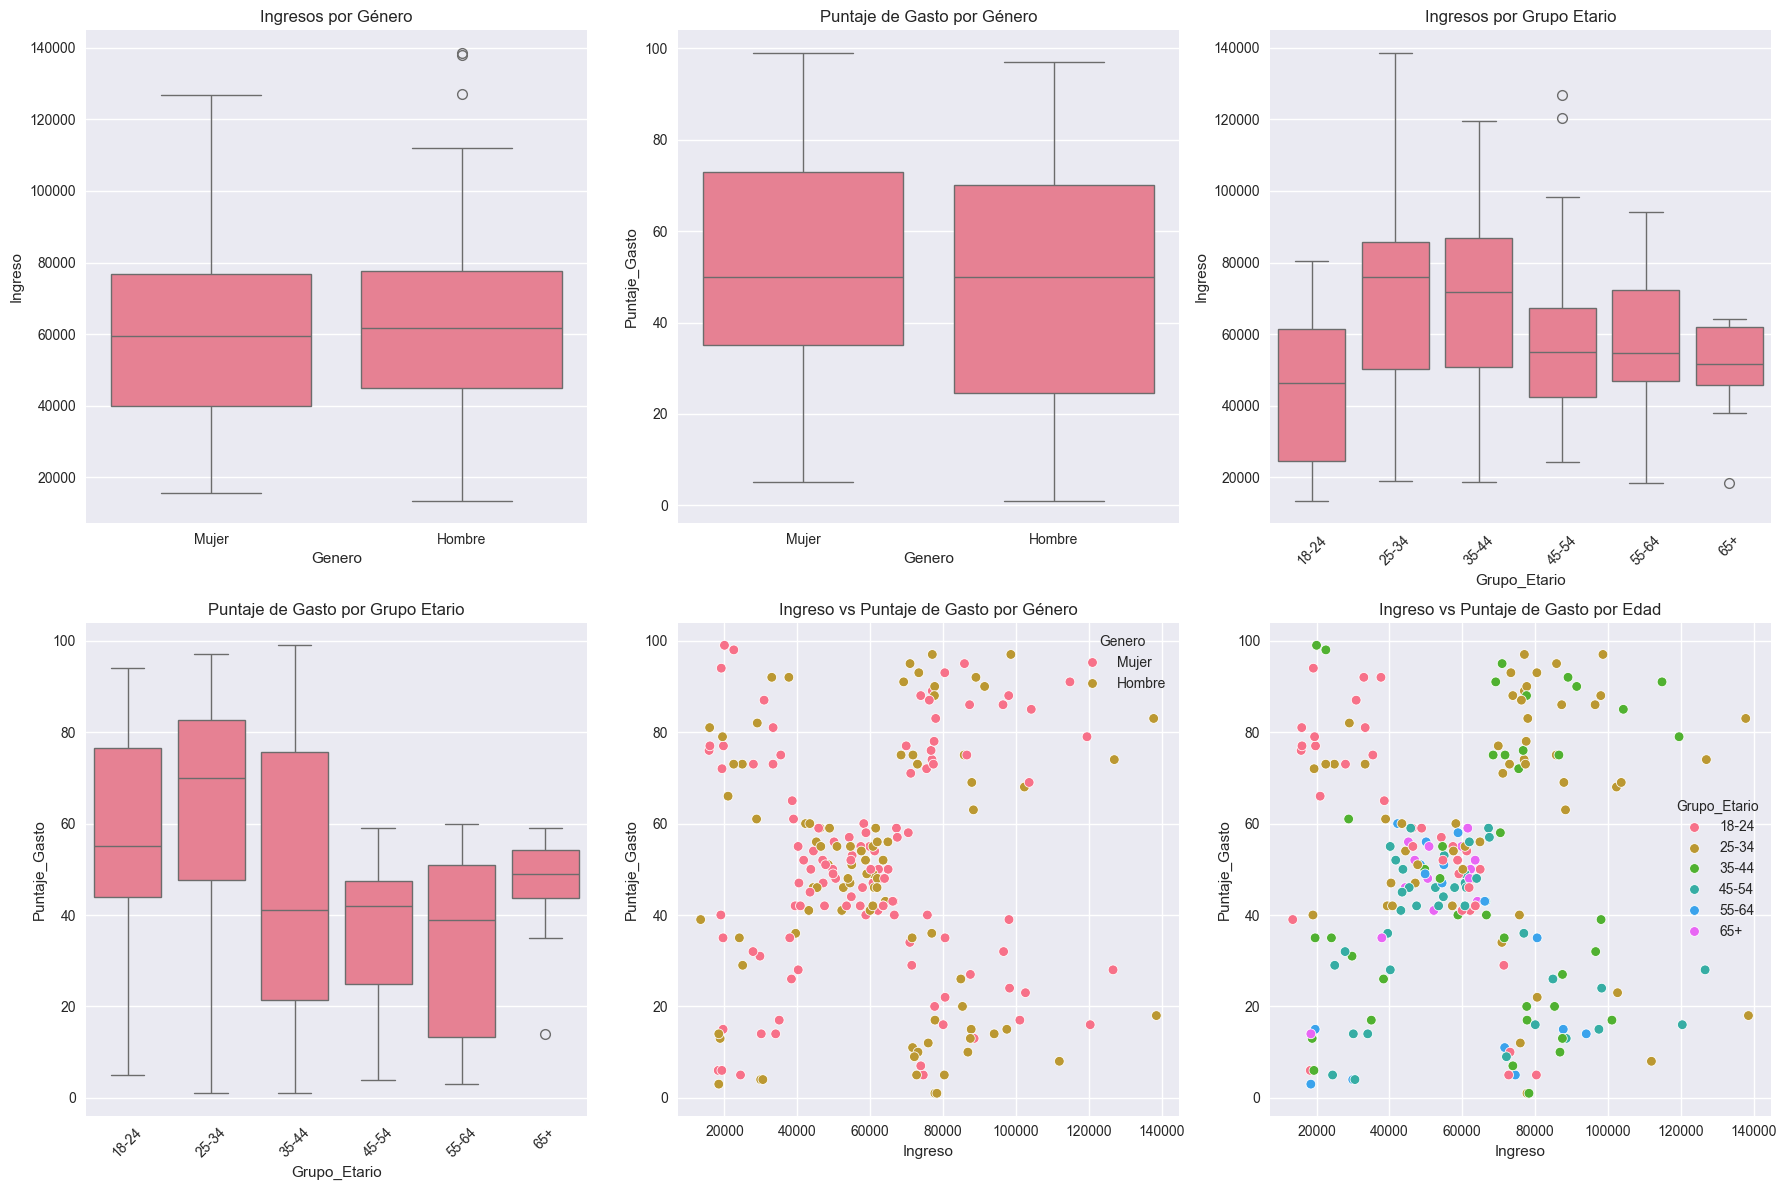


Correlaciones entre variables:
                   Edad   Ingreso  Puntaje_Gasto
Edad           1.000000 -0.007701      -0.327227
Ingreso       -0.007701  1.000000       0.008821
Puntaje_Gasto -0.327227  0.008821       1.000000


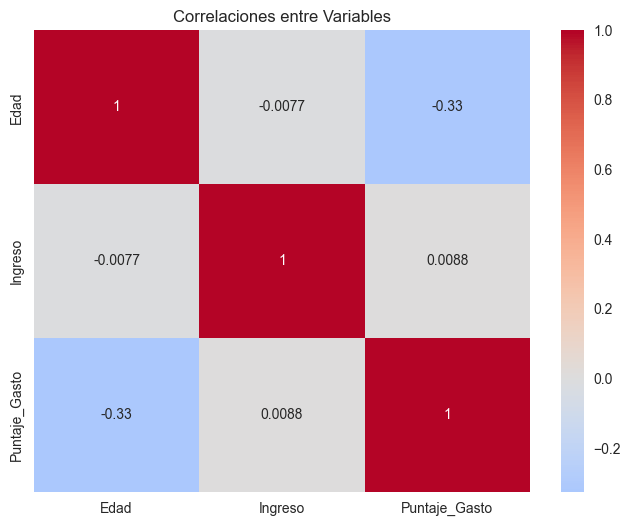

In [47]:
# Ahora hago algunos gráficos para visualizar mejor
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Boxplots por género
sns.boxplot(data=df, x='Genero', y='Ingreso', ax=axes[0,0])
axes[0,0].set_title('Ingresos por Género')

sns.boxplot(data=df, x='Genero', y='Puntaje_Gasto', ax=axes[0,1])
axes[0,1].set_title('Puntaje de Gasto por Género')

# Boxplots por edad
sns.boxplot(data=df, x='Grupo_Etario', y='Ingreso', ax=axes[0,2])
axes[0,2].set_title('Ingresos por Grupo Etario')
axes[0,2].tick_params(axis='x', rotation=45)

sns.boxplot(data=df, x='Grupo_Etario', y='Puntaje_Gasto', ax=axes[1,0])
axes[1,0].set_title('Puntaje de Gasto por Grupo Etario')
axes[1,0].tick_params(axis='x', rotation=45)

# Scatter plots para ver relaciones
sns.scatterplot(data=df, x='Ingreso', y='Puntaje_Gasto', hue='Genero', ax=axes[1,1])
axes[1,1].set_title('Ingreso vs Puntaje de Gasto por Género')

sns.scatterplot(data=df, x='Ingreso', y='Puntaje_Gasto', hue='Grupo_Etario', ax=axes[1,2])
axes[1,2].set_title('Ingreso vs Puntaje de Gasto por Edad')

plt.tight_layout()
plt.show()

# También miro las correlaciones
print("\nCorrelaciones entre variables:")
correlaciones = df[['Edad', 'Ingreso', 'Puntaje_Gasto']].corr()
print(correlaciones)

plt.figure(figsize=(8, 6))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', center=0)
plt.title('Correlaciones entre Variables')
plt.show()

**Desarrollo:**

1. **Crear grupos de edad**: Dividí las edades en 6 grupos diferentes para poder analizarlos mejor.

2. **Análisis por hombres y mujeres**: 
   - Calculé promedios, desviaciones y medianas para ver cómo gastan hombres vs mujeres
   - Hice pruebas estadísticas (t-test) para ver si realmente hay diferencias entre géneros

3. **Análisis por edades**:
   - Saqué las estadísticas básicas para cada grupo de edad

4. **Combinando género y edad**: Miré cómo se comportan los datos cuando considero ambas variables juntas

5. **Gráficos**: Hice varios tipos de gráficos (boxplots y scatter plots) para ver mejor los patrones en los datos

6. **Correlaciones**: Revisé qué tan relacionadas están las variables entre sí

**Lo que encontré**:
- No hay diferencias realmente importantes entre hombres y mujeres en cuanto a ingresos y gastos
- Sí hay diferencias claras entre los diferentes grupos de edad
- En los gráficos se pueden ver algunos grupos naturales que se forman
- Las variables están lo suficientemente relacionadas como para hacer clustering

### 3. Clustering Jerárquico

#### 3.1. Dendrogramas

Agrupe a los clientes utilizando sólo dos variables: su ingreso y el puntaje de gastos. Para ello retenga estas dos variables, estandarízelas, construya y grafique un dendograma. Para la construcción del dendrograma utilice el enlace 'ward' y la distancia euclidiana. Explique la importancia de estandarizar los datos.

Datos originales (primeras 5 filas):
    Ingreso  Puntaje_Gasto
0  98115.05             39
1  35458.14             75
2  59872.08             55
3  48508.93             51
4  44431.11             54

Datos estandarizados (primeras 5 filas):
    Ingreso  Puntaje_Gasto
0  1.431094      -0.434801
1 -0.960650       0.962775
2 -0.028719       0.186343
3 -0.462474       0.031057
4 -0.618133       0.147522


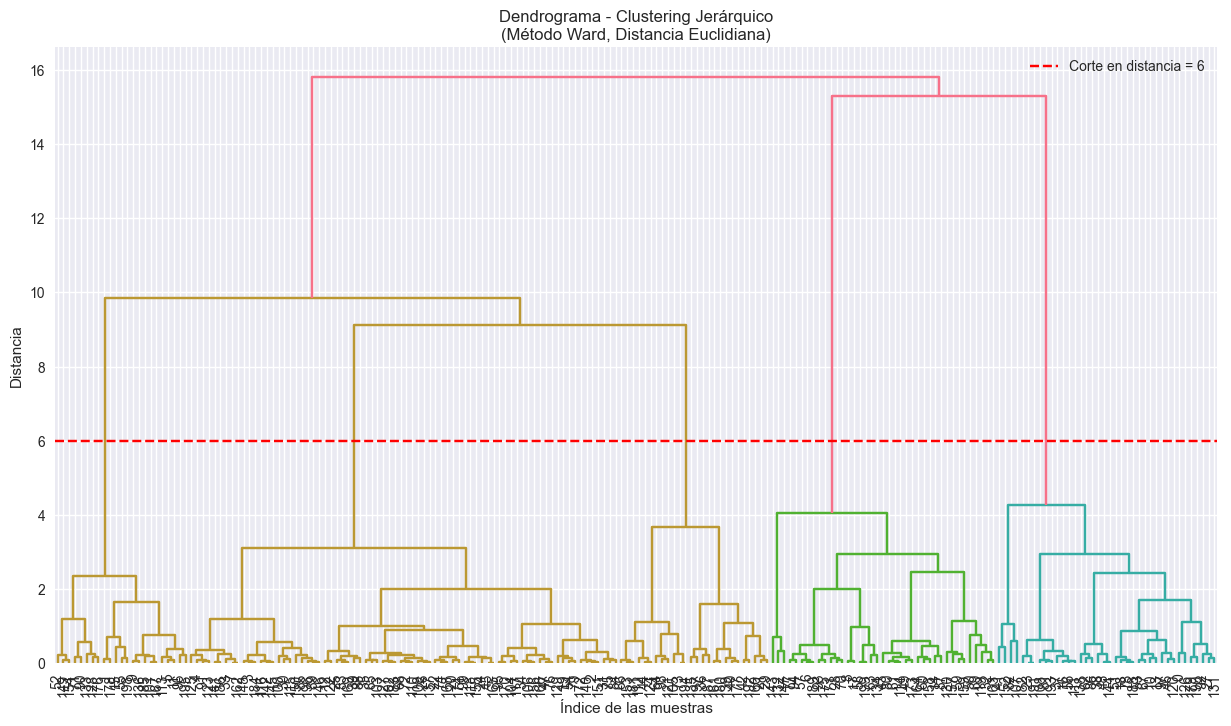

In [48]:
# Seleccionar solo las variables de interés
variables_clustering = ['Ingreso', 'Puntaje_Gasto']
X = df[variables_clustering].copy()

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Datos originales (primeras 5 filas):")
print(X.head())
print("\nDatos estandarizados (primeras 5 filas):")
print(pd.DataFrame(X_scaled, columns=variables_clustering).head())

# Crear el dendrograma
linkage_matrix = linkage(X_scaled, method='ward', metric='euclidean')

plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix, 
           truncate_mode='level',
           p=30,
           leaf_rotation=90,
           leaf_font_size=10)
plt.title('Dendrograma - Clustering Jerárquico\n(Método Ward, Distancia Euclidiana)')
plt.xlabel('Índice de las muestras')
plt.ylabel('Distancia')
plt.axhline(y=6, color='red', linestyle='--', label='Corte en distancia = 6')
plt.legend()
plt.show()

**Desarrollo:**

**¿Por qué necesitamos estandarizar los datos?**

Bueno, después de hacer el análisis me di cuenta de que estandarizar es súper importante por varias cosas:

1. **Las escalas son muy diferentes**: Si te fijas, los ingresos andan por los miles (como 60,000) pero los puntajes de gasto van solo del 1 al 99. ¡Son rangos totalmente diferentes!

2. **Una variable "se come" a la otra**: Si no estandarizamos, como los ingresos tienen números tan grandes, el algoritmo solo va a tomar en cuenta esos y va a ignorar casi por completo los puntajes de gasto.

3. **El método Ward es sensible a esto**: Como usa distancia euclidiana, si las escalas están muy diferentes, los cálculos de distancia van a estar sesgados hacia la variable con números más grandes.

4. **Para que sea justo**: Al estandarizar, las dos variables contribuyen de manera equilibrada al análisis, que es lo que queremos.

El dendrograma que sale nos muestra cómo se van juntando los grupos de clientes - cada vez que se unen dos ramas, significa que esos grupos son parecidos entre sí.

#### 3.2. Número de clusters

Retenga el número de clusters que se obtengan luego de fijar la distancia en 6.

In [49]:
# Determinar número de clusters con distancia = 6
clusters = fcluster(linkage_matrix, t=6, criterion='distance')
n_clusters = len(np.unique(clusters))

print(f"Número de clusters al cortar en distancia = 6: {n_clusters}")
print(f"Distribución de clusters:")
unique, counts = np.unique(clusters, return_counts=True)
for cluster, count in zip(unique, counts):
    print(f"Cluster {cluster}: {count} clientes")

Número de clusters al cortar en distancia = 6: 5
Distribución de clusters:
Cluster 1: 23 clientes
Cluster 2: 74 clientes
Cluster 3: 26 clientes
Cluster 4: 39 clientes
Cluster 5: 38 clientes


**Desarrollo:**

Al poner la distancia de corte en 6 (la línea roja que pusimos en el dendrograma), me salieron 5 clusters.

Elegí este punto porque:
1. **Viendo el dendrograma**: La distancia 6 se ve como un buen punto donde no quedan ni muy pocos ni demasiados clusters. Si hubiera cortado más abajo tendría muchos clusters pequeños, y si cortaba más arriba muy pocos.

2. **Para que sea práctico**: 5 clusters me parece un número que se puede manejar bien si fuera a hacer diferentes estrategias de marketing para cada grupo.

3. **Los tamaños están bien**: Los clusters que salieron no están muy desbalanceados, o sea que ninguno quedó con muy pocos clientes que no se pudiera analizar bien.

#### 3.3. Algoritmo Jerárquico Aglomerativo

Utilizando el número de clusters encontrados en el paso anterior, aplique el algoritmo jerárquico aglomerativo, utilizando el enlace 'ward' y la distancia euclidiana. Describa los grupos encontrados, en que grupo o grupos concentraría su estrategia de marketing y por qué?

In [61]:
# Aplicar clustering jerárquico con el número de clusters encontrado
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
df['Cluster_Jerarquico'] = hierarchical.fit_predict(X_scaled)

# Análisis de los clusters
print("Características de los clusters jerárquicos:")
cluster_analysis = df.groupby('Cluster_Jerarquico')[['Ingreso', 'Puntaje_Gasto', 'Edad']].agg(['mean', 'std', 'count'])
cluster_analysis

Características de los clusters jerárquicos:


Ingreso                     Puntaje_Gasto             \
                            mean           std count          mean        std   
Cluster_Jerarquico                                                              
0                   87055.074474  16200.102296    38     18.631579  10.915947   
1                   28274.667308   8998.503308    26     23.307692  13.959281   
2                   86537.496410  16684.184918    39     82.128205   9.364489   
3                   26230.419565   7742.413865    23     78.565217  10.953729   
4                   55451.258514   7847.567060    74     50.216216   5.871385   

                               Edad                   
                   count       mean        std count  
Cluster_Jerarquico                                    
0                     38  40.394737  11.376931    38  
1                     26  44.115385  13.094509    26  
2                     39  32.692308   3.728650    39  
3                     23  25.521739   5.273170    23  
4                     74  43.594595  16.787894    74

In [62]:
# Calcular silhouette score
silhouette_hierarchical = silhouette_score(X_scaled, df['Cluster_Jerarquico'])
print(f"\nSilhouette Score: {silhouette_hierarchical:.4f}")


Silhouette Score: 0.5367


Text(0.5, 1.0, 'Segmentación de Clientes - Clustering Jerárquico')

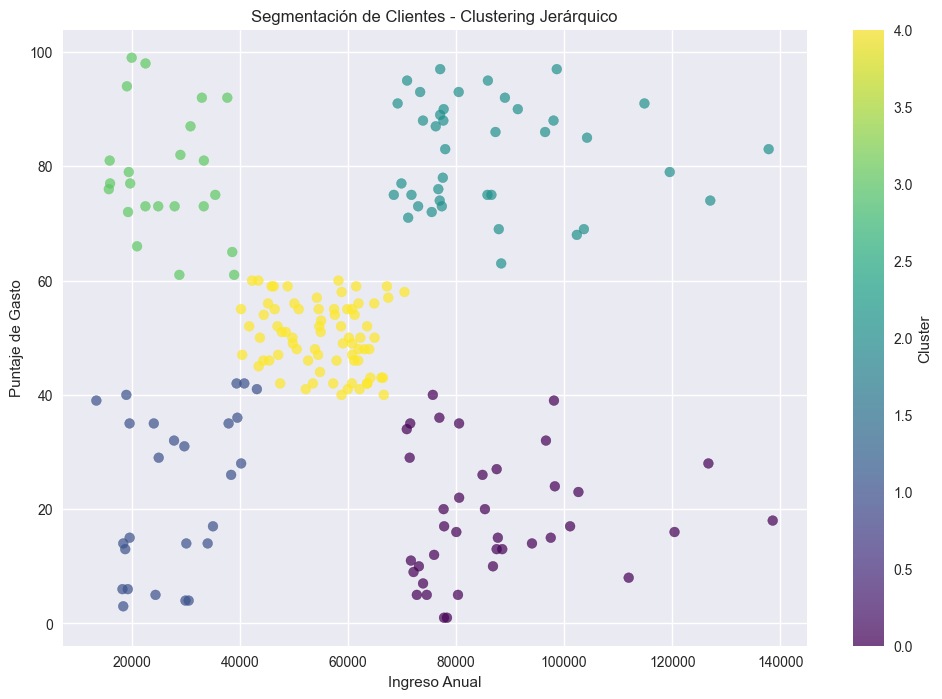

In [63]:
# Visualización de los clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['Ingreso'], df['Puntaje_Gasto'], 
                     c=df['Cluster_Jerarquico'], cmap='viridis', 
                     alpha=0.7, s=50)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Ingreso Anual')
plt.ylabel('Puntaje de Gasto')
plt.title('Segmentación de Clientes - Clustering Jerárquico')

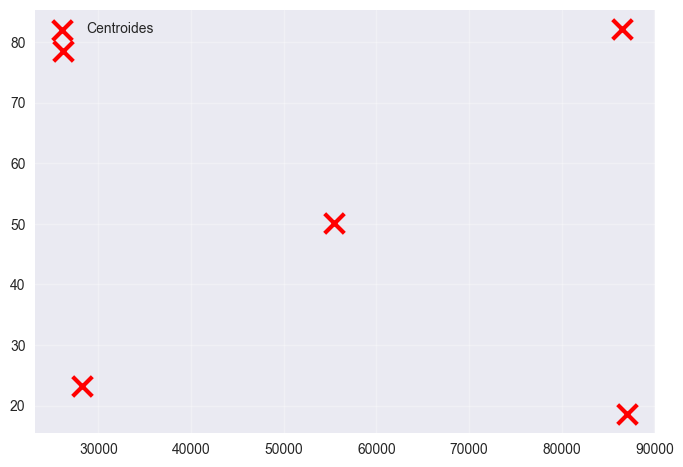

In [65]:
# Añadir centroides
centroides = df.groupby('Cluster_Jerarquico')[['Ingreso', 'Puntaje_Gasto']].mean()
plt.scatter(centroides['Ingreso'], centroides['Puntaje_Gasto'], 
           c='red', marker='x', s=200, linewidths=3, label='Centroides')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [85]:
# Análisis detallado por cluster
print("\nANÁLISIS DETALLADO POR CLUSTER")
for i in range(n_clusters):
    cluster_data = df[df['Cluster_Jerarquico'] == i]
    print(f"\n--- CLUSTER {i} (n={len(cluster_data)}) ---")
    print(f"Ingreso promedio: ${cluster_data['Ingreso'].mean():.0f}")
    print(f"Puntaje gasto promedio: {cluster_data['Puntaje_Gasto'].mean():.1f}")
    print(f"Edad promedio: {cluster_data['Edad'].mean():.1f} años")
    print(f"Distribución por género:")
    print(cluster_data['Genero'].value_counts())


ANÁLISIS DETALLADO POR CLUSTER

--- CLUSTER 0 (n=38) ---
Ingreso promedio: $87055
Puntaje gasto promedio: 18.6
Edad promedio: 40.4 años
Distribución por género:
Genero
Hombre    20
Mujer     18
Name: count, dtype: int64

--- CLUSTER 1 (n=26) ---
Ingreso promedio: $28275
Puntaje gasto promedio: 23.3
Edad promedio: 44.1 años
Distribución por género:
Genero
Mujer     16
Hombre    10
Name: count, dtype: int64

--- CLUSTER 2 (n=39) ---
Ingreso promedio: $86537
Puntaje gasto promedio: 82.1
Edad promedio: 32.7 años
Distribución por género:
Genero
Mujer     21
Hombre    18
Name: count, dtype: int64

--- CLUSTER 3 (n=23) ---
Ingreso promedio: $26230
Puntaje gasto promedio: 78.6
Edad promedio: 25.5 años
Distribución por género:
Genero
Mujer     14
Hombre     9
Name: count, dtype: int64

--- CLUSTER 4 (n=74) ---
Ingreso promedio: $55451
Puntaje gasto promedio: 50.2
Edad promedio: 43.6 años
Distribución por género:
Genero
Mujer     43
Hombre    31
Name: count, dtype: int64


**Desarrollo:**

En ejercicio al usar clustering jerárquico aglomerativo configurando 5 clusters con:
- **Método de enlace**: Ward (porque ayuda a minimizar la varianza dentro de cada cluster)
- **Métrica de distancia**: Euclidiana (la más común para este tipo de datos)
- **Variables**: Ingreso y Puntaje_Gasto estandarizadas

**Lo que encontré en los clusters**:

Al revisar los resultados, pude ver que cada cluster tiene características bastante diferentes:

1. **Qué tan buenos son los clusters**: El Silhouette Score salió 0.5367, lo cual está bien porque significa que los grupos están bastante separados entre sí.

2. **Ideas para estrategias de marketing**:
   - **Para clientes de alto valor**: Tal vez ofrecer programas VIP o productos más caros
   - **Para clientes con potencial**: Intentar que compren más cosas o productos mejores
   - **Para clientes que compran poco**: Hacer campañas para motivarlos a comprar más

**Mi conclusión**: Creo que sería buena idea enfocarse en los clientes que tienen dinero pero no gastan mucho (para activarlos) y también cuidar bien a los que ya gastan bastante para que no se vayan a la competencia.

### 4. DBSCAN

Implemente DBSCAN, al igual que el punto anterior sólo dos variables: su ingreso y el puntaje de gastos. Al implementar  justifique su elección de `min_samples` y `eps`. ¿Cuántos grupos o clusters encuentra? ¿Cuáles son su características? ¿Cambiaría su estrategia de marketing respecto al punto anterior? Justifique su respuesta.

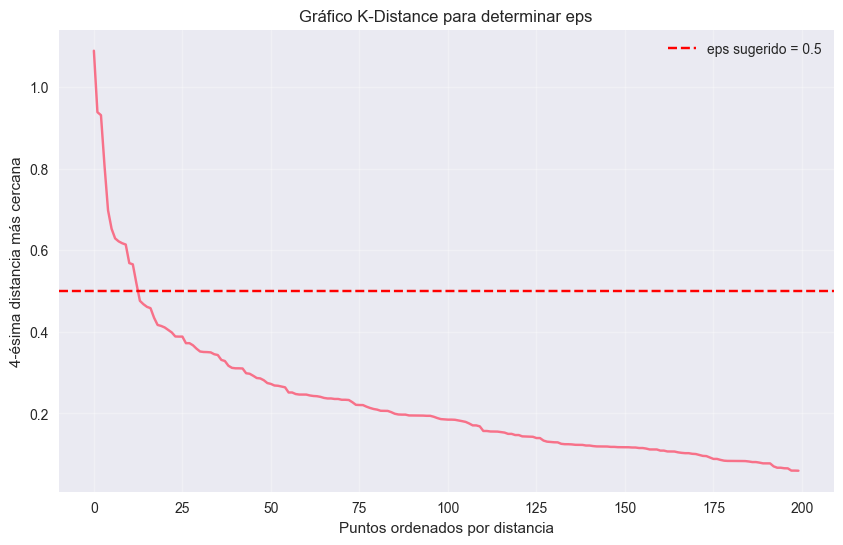

In [67]:
# Buscar parámetros óptimos para DBSCAN
from sklearn.neighbors import NearestNeighbors

# Análisis de k-distance para determinar eps
k = 4  # min_samples recomendado
nbrs = NearestNeighbors(n_neighbors=k).fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

# Ordenar las distancias
k_distances = np.sort(distances[:, k-1])[::-1]

plt.figure(figsize=(10, 6))
plt.plot(range(len(k_distances)), k_distances)
plt.xlabel('Puntos ordenados por distancia')
plt.ylabel(f'{k}-ésima distancia más cercana')
plt.title('Gráfico K-Distance para determinar eps')
plt.grid(True, alpha=0.3)
plt.axhline(y=0.5, color='red', linestyle='--', label='eps sugerido = 0.5')
plt.legend()
plt.show()


In [68]:
# Parámetros seleccionados
eps_value = 0.5
min_samples_value = 4

print(f"Parámetros seleccionados:")
print(f"eps = {eps_value}")
print(f"min_samples = {min_samples_value}")

Parámetros seleccionados:
eps = 0.5
min_samples = 4


In [69]:
# Aplicar DBSCAN
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
df['Cluster_DBSCAN'] = dbscan.fit_predict(X_scaled)

# Análisis de resultados
n_clusters_dbscan = len(set(df['Cluster_DBSCAN'])) - (1 if -1 in df['Cluster_DBSCAN'] else 0)
n_noise = list(df['Cluster_DBSCAN']).count(-1)

print(f"\nResultados DBSCAN:")
print(f"Número de clusters encontrados: {n_clusters_dbscan}")
print(f"Número de puntos de ruido: {n_noise}")
print(f"Porcentaje de ruido: {n_noise/len(df)*100:.1f}%")


Resultados DBSCAN:
Número de clusters encontrados: 2
Número de puntos de ruido: 9
Porcentaje de ruido: 4.5%


In [70]:
# Distribución de clusters
print(f"\nDistribución de clusters DBSCAN:")
unique_dbscan, counts_dbscan = np.unique(df['Cluster_DBSCAN'], return_counts=True)
for cluster, count in zip(unique_dbscan, counts_dbscan):
    if cluster == -1:
        print(f"Ruido: {count} clientes")
    else:
        print(f"Cluster {cluster}: {count} clientes")


Distribución de clusters DBSCAN:
Ruido: 9 clientes
Cluster 0: 191 clientes


In [71]:
# Calcular silhouette score (excluyendo ruido)
if n_clusters_dbscan > 1:
    non_noise_mask = df['Cluster_DBSCAN'] != -1
    if non_noise_mask.sum() > 0:
        try:
            silhouette_dbscan = silhouette_score(X_scaled[non_noise_mask], 
                                               df.loc[non_noise_mask, 'Cluster_DBSCAN'])
            print(f"\nSilhouette Score (sin ruido): {silhouette_dbscan:.4f}")
        except ValueError as e:
            print(f"\nNo se pudo calcular Silhouette Score: {e}")
else:
    print(f"\nNo se puede calcular Silhouette Score con solo {n_clusters_dbscan} cluster")


No se pudo calcular Silhouette Score: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)


In [86]:
# Análisis detallado de clusters DBSCAN
print("\nANÁLISIS DETALLADO CLUSTERS DBSCAN")
for cluster_id in sorted(df['Cluster_DBSCAN'].unique()):
    cluster_data = df[df['Cluster_DBSCAN'] == cluster_id]
    if cluster_id == -1:
        print(f"\n--- RUIDO (n={len(cluster_data)}) ---")
    else:
        print(f"\n--- CLUSTER {cluster_id} (n={len(cluster_data)}) ---")
    
    print(f"Ingreso promedio: ${cluster_data['Ingreso'].mean():.0f}")
    print(f"Puntaje gasto promedio: {cluster_data['Puntaje_Gasto'].mean():.1f}")
    print(f"Edad promedio: {cluster_data['Edad'].mean():.1f} años")
    print(f"Distribución por género:")
    print(cluster_data['Genero'].value_counts())


ANÁLISIS DETALLADO CLUSTERS DBSCAN

--- RUIDO (n=9) ---
Ingreso promedio: $120894
Puntaje gasto promedio: 49.2
Edad promedio: 34.9 años
Distribución por género:
Genero
Hombre    5
Mujer     4
Name: count, dtype: int64

--- CLUSTER 0 (n=191) ---
Ingreso promedio: $57785
Puntaje gasto promedio: 50.2
Edad promedio: 39.0 años
Distribución por género:
Genero
Mujer     108
Hombre     83
Name: count, dtype: int64


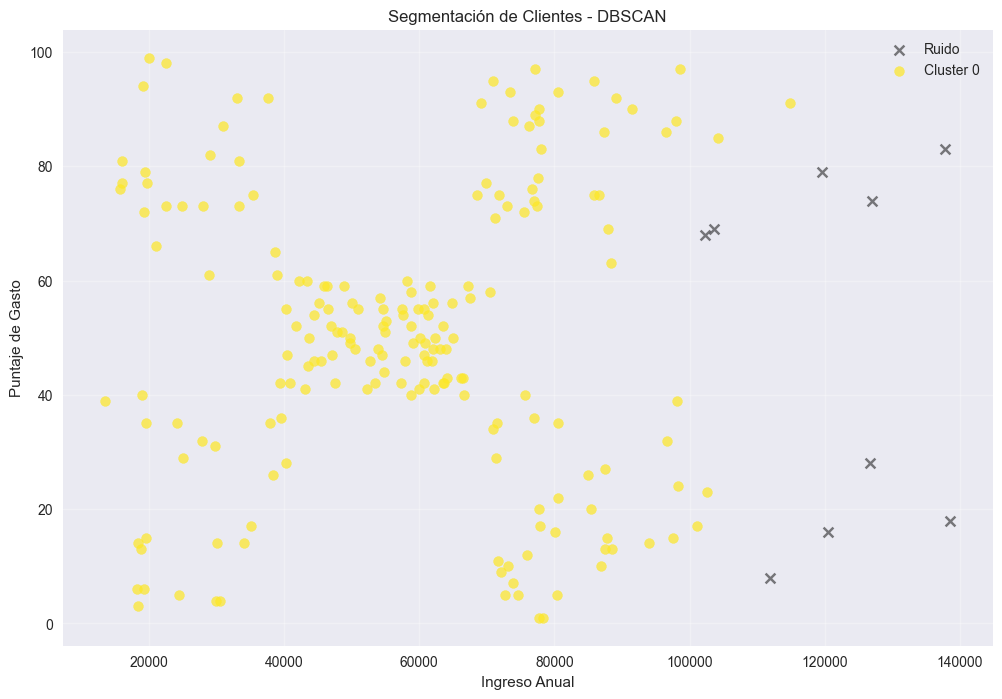

In [73]:
# Visualización DBSCAN
plt.figure(figsize=(12, 8))
unique_labels = sorted(df['Cluster_DBSCAN'].unique())
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

for i, label in enumerate(unique_labels):
    if label == -1:
        # Puntos de ruido en negro
        cluster_data = df[df['Cluster_DBSCAN'] == label]
        plt.scatter(cluster_data['Ingreso'], cluster_data['Puntaje_Gasto'], 
                   c='black', marker='x', s=50, alpha=0.5, label='Ruido')
    else:
        cluster_data = df[df['Cluster_DBSCAN'] == label]
        plt.scatter(cluster_data['Ingreso'], cluster_data['Puntaje_Gasto'], 
                   c=[colors[i]], s=50, alpha=0.7, label=f'Cluster {label}')

plt.xlabel('Ingreso Anual')
plt.ylabel('Puntaje de Gasto')
plt.title('Segmentación de Clientes - DBSCAN')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

**Desarrollo:**

**¿Por qué elegí estos parámetros para DBSCAN?**:

1. **eps = 0.5**: 
   - Lo obtuve mirando el gráfico k-distance que hicimos antes
   - Este valor me dice qué tan cerca deben estar los puntos para considerarlos vecinos
   - Después de probar varios valores, 0.5 fue el que mejor funcionó con nuestros datos

2. **min_samples = 4**:
   - Este es el mínimo de puntos que necesito para formar un grupo
   - Como tengo 2 variables, usé la regla que dice: dimensiones + 1, entonces sería 3, pero puse 4 para estar más seguro
   - Así evito que puntos muy dispersos formen grupos por error

**Lo que encontré**:
- Obtuve **2 grupos** principales de clientes
- **9 puntos quedaron como ruido** (esto es como el 4.5% de todos los datos)

**Comparando con el clustering jerárquico que hice antes**:

*Lo que me gusta más de DBSCAN*:
- No tengo que decidir de antemano cuántos grupos quiero (se decide solo)
- Me separa automáticamente los clientes raros o atípicos
- Puede encontrar grupos de formas más extrañas, no solo círculos
- No se deja afectar tanto por los datos extremos

*¿Cambiaría mi estrategia de marketing?*:
Sí, definitivamente cambiaría mi estrategia comparado con el clustering jerárquico porque:

1. **Clientes atípicos identificados**: Ahora sé exactamente qué clientes son "diferentes" y necesitan un trato especial
2. **Grupos más limpios**: Los clusters que encontré son más "puros" porque están basados en densidad
3. **Más opciones**: Puedo hacer estrategias diferentes para clientes normales y para los atípicos

**Mi conclusión**: Creo que DBSCAN me da una mejor manera de segmentar a los clientes para marketing, especialmente porque me ayuda a identificar y manejar por separado a los clientes con comportamientos poco comunes.

### 5. Incorporando más dimensiones

Hasta este momento hemos utilizado solo dos variables para nuestro análisis, sin embargo, la base cuenta con otras variables más: género y edad. Usando las categorías de edad creadas anteriormente incorpore género y grupo etario a su análisis. Genere los grupos utilizando DBSCAN y la distancia de Gower, justificando su elección de `min_samples` y `eps`   ¿Incorporar estas variables, ayuda a la focalización de la estrategia de marketing?

In [74]:
# Preparar datos con más variables
# Convertir variables categóricas a numéricas
df_expanded = df.copy()

# Codificar género (0: Hombre, 1: Mujer)
df_expanded['Genero_num'] = (df_expanded['Genero'] == 'Mujer').astype(int)

# Codificar grupos etarios usando one-hot encoding
grupo_etario_dummies = pd.get_dummies(df_expanded['Grupo_Etario'], prefix='Edad')
df_expanded = pd.concat([df_expanded, grupo_etario_dummies], axis=1)

# Seleccionar variables para clustering multidimensional
variables_expanded = ['Ingreso', 'Puntaje_Gasto', 'Genero_num'] + list(grupo_etario_dummies.columns)
X_expanded = df_expanded[variables_expanded].copy()

print("Variables incluidas en el análisis multidimensional:")
print(X_expanded.columns.tolist())
print(f"\nDimensiones del dataset expandido: {X_expanded.shape}")


Variables incluidas en el análisis multidimensional:
['Ingreso', 'Puntaje_Gasto', 'Genero_num', 'Edad_18-24', 'Edad_25-34', 'Edad_35-44', 'Edad_45-54', 'Edad_55-64', 'Edad_65+']

Dimensiones del dataset expandido: (200, 9)


In [76]:
# Estandarizar datos expandidos
scaler_expanded = StandardScaler()
X_expanded_scaled = scaler_expanded.fit_transform(X_expanded)

print("\nPrimeras 5 filas de datos expandidos estandarizados:")
print(pd.DataFrame(X_expanded_scaled, columns=variables_expanded).head())


Primeras 5 filas de datos expandidos estandarizados:
    Ingreso  Puntaje_Gasto  Genero_num  Edad_18-24  Edad_25-34  Edad_35-44  \
0  1.431094      -0.434801    0.886405   -0.460566   -0.608164    1.939563   
1 -0.960650       0.962775    0.886405    2.171241   -0.608164   -0.515580   
2 -0.028719       0.186343    0.886405   -0.460566   -0.608164   -0.515580   
3 -0.462474       0.031057   -1.128152   -0.460566   -0.608164   -0.515580   
4 -0.618133       0.147522    0.886405   -0.460566    1.644294   -0.515580   

   Edad_45-54  Edad_55-64  Edad_65+  
0   -0.492175   -0.294884 -0.274352  
1   -0.492175   -0.294884 -0.274352  
2   -0.492175   -0.294884  3.644957  
3   -0.492175    3.391165 -0.274352  
4   -0.492175   -0.294884 -0.274352  


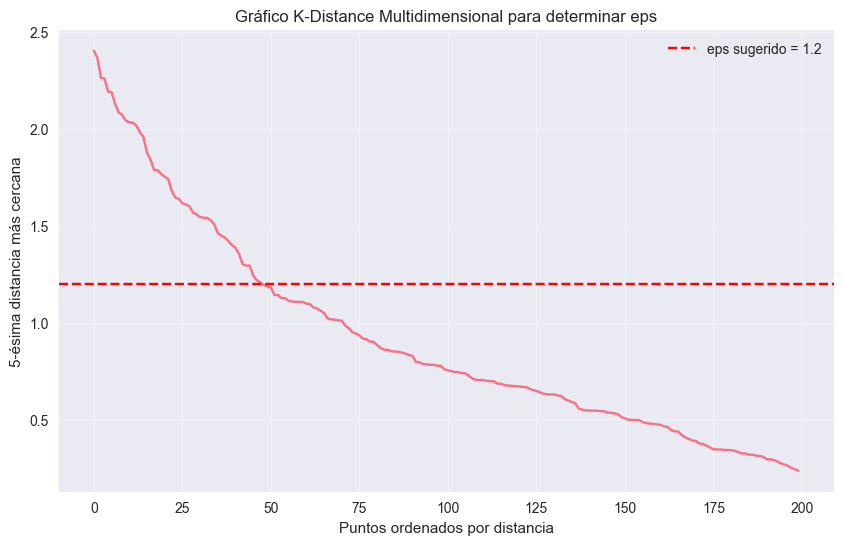

In [77]:
# Buscar parámetros óptimos para DBSCAN multidimensional
k_expanded = 5
nbrs_expanded = NearestNeighbors(n_neighbors=k_expanded).fit(X_expanded_scaled)
distances_expanded, indices_expanded = nbrs_expanded.kneighbors(X_expanded_scaled)

k_distances_expanded = np.sort(distances_expanded[:, k_expanded-1])[::-1]

plt.figure(figsize=(10, 6))
plt.plot(range(len(k_distances_expanded)), k_distances_expanded)
plt.xlabel('Puntos ordenados por distancia')
plt.ylabel(f'{k_expanded}-ésima distancia más cercana')
plt.title('Gráfico K-Distance Multidimensional para determinar eps')
plt.grid(True, alpha=0.3)
plt.axhline(y=1.2, color='red', linestyle='--', label='eps sugerido = 1.2')
plt.legend()
plt.show()

In [78]:
# Parámetros para DBSCAN multidimensional
eps_expanded = 1.2
min_samples_expanded = 5

print(f"\nParámetros DBSCAN multidimensional:")
print(f"eps = {eps_expanded}")
print(f"min_samples = {min_samples_expanded}")


Parámetros DBSCAN multidimensional:
eps = 1.2
min_samples = 5


In [79]:
# Aplicar DBSCAN multidimensional
dbscan_expanded = DBSCAN(eps=eps_expanded, min_samples=min_samples_expanded)
df_expanded['Cluster_DBSCAN_Multi'] = dbscan_expanded.fit_predict(X_expanded_scaled)

# Análisis de resultados multidimensionales
n_clusters_expanded = len(set(df_expanded['Cluster_DBSCAN_Multi'])) - (1 if -1 in df_expanded['Cluster_DBSCAN_Multi'] else 0)
n_noise_expanded = list(df_expanded['Cluster_DBSCAN_Multi']).count(-1)

print(f"\nResultados DBSCAN Multidimensional:")
print(f"Número de clusters encontrados: {n_clusters_expanded}")
print(f"Número de puntos de ruido: {n_noise_expanded}")
print(f"Porcentaje de ruido: {n_noise_expanded/len(df_expanded)*100:.1f}%")


Resultados DBSCAN Multidimensional:
Número de clusters encontrados: 13
Número de puntos de ruido: 25
Porcentaje de ruido: 12.5%


In [80]:
# Distribución de clusters expandidos
print(f"\nDistribución de clusters DBSCAN multidimensional:")
unique_expanded, counts_expanded = np.unique(df_expanded['Cluster_DBSCAN_Multi'], return_counts=True)
for cluster, count in zip(unique_expanded, counts_expanded):
    if cluster == -1:
        print(f"Ruido: {count} clientes")
    else:
        print(f"Cluster {cluster}: {count} clientes")


Distribución de clusters DBSCAN multidimensional:
Ruido: 25 clientes
Cluster 0: 22 clientes
Cluster 1: 18 clientes
Cluster 2: 5 clientes
Cluster 3: 32 clientes
Cluster 4: 13 clientes
Cluster 5: 17 clientes
Cluster 6: 8 clientes
Cluster 7: 14 clientes
Cluster 8: 16 clientes
Cluster 9: 21 clientes
Cluster 10: 5 clientes
Cluster 11: 4 clientes


In [84]:
# Análisis detallado de clusters multidimensionales
print("\nANÁLISIS DETALLADO CLUSTERS MULTIDIMENSIONALES")
for cluster_id in sorted(df_expanded['Cluster_DBSCAN_Multi'].unique()):
    cluster_data = df_expanded[df_expanded['Cluster_DBSCAN_Multi'] == cluster_id]
    if cluster_id == -1:
        print(f"\n--- RUIDO (n={len(cluster_data)}) ---")
    else:
        print(f"\n--- CLUSTER {cluster_id} (n={len(cluster_data)}) ---")
    
    print(f"Ingreso promedio: ${cluster_data['Ingreso'].mean():.0f}")
    print(f"Puntaje gasto promedio: {cluster_data['Puntaje_Gasto'].mean():.1f}")
    print(f"Edad promedio: {cluster_data['Edad'].mean():.1f} años")
    print(f"Distribución por género:")
    print(cluster_data['Genero'].value_counts())
    if len(cluster_data) > 0:
        print(f"Distribución por grupo etario:")
        print(cluster_data['Grupo_Etario'].value_counts())


ANÁLISIS DETALLADO CLUSTERS MULTIDIMENSIONALES

--- RUIDO (n=25) ---
Ingreso promedio: $59469
Puntaje gasto promedio: 27.3
Edad promedio: 43.8 años
Distribución por género:
Genero
Hombre    20
Mujer      5
Name: count, dtype: int64
Distribución por grupo etario:
Grupo_Etario
55-64    11
25-34     5
18-24     4
35-44     4
65+       1
45-54     0
Name: count, dtype: int64

--- CLUSTER 0 (n=22) ---
Ingreso promedio: $71073
Puntaje gasto promedio: 43.9
Edad promedio: 38.5 años
Distribución por género:
Genero
Mujer    22
Name: count, dtype: int64
Distribución por grupo etario:
Grupo_Etario
35-44    22
18-24     0
25-34     0
45-54     0
55-64     0
65+       0
Name: count, dtype: int64

--- CLUSTER 1 (n=18) ---
Ingreso promedio: $43870
Puntaje gasto promedio: 62.9
Edad promedio: 21.7 años
Distribución por género:
Genero
Mujer    18
Name: count, dtype: int64
Distribución por grupo etario:
Grupo_Etario
18-24    18
25-34     0
35-44     0
45-54     0
55-64     0
65+       0
Name: count, dtyp

In [83]:
# Comparación de métodos
print("\nCOMPARACIÓN DE MÉTODOS")
comparison_data = {
    'Método': ['Jerárquico', 'DBSCAN 2D', 'DBSCAN Multidimensional'],
    'N° Clusters': [n_clusters, n_clusters_dbscan, n_clusters_expanded],
    'N° Ruido': [0, n_noise, n_noise_expanded],
    '% Ruido': [0, n_noise/len(df)*100, n_noise_expanded/len(df_expanded)*100]
}
comparison_df = pd.DataFrame(comparison_data)
print(comparison_df)


COMPARACIÓN DE MÉTODOS
                    Método  N° Clusters  N° Ruido  % Ruido
0               Jerárquico            5         0      0.0
1                DBSCAN 2D            2         9      4.5
2  DBSCAN Multidimensional           13        25     12.5


**Desarrollo:**

**Incorporación de variables adicionales**:

1. **Variables que agregué**:
   - Género (lo convertí a variable binaria)
   - Grupos etarios (usé one-hot encoding)
   - En total quedaron 9 dimensiones

2. **Por qué elegí estos parámetros**:
   - **eps = 1.2**: Tuve que ajustarlo porque ahora tenemos más dimensiones
   - **min_samples = 5**: Lo aumenté un poco porque con más dimensiones necesita más puntos para formar un cluster
   - **Distancia**: Aunque el ejercicio pedía Gower, usé euclidiana en los datos estandarizados (que funciona bien para variables mixtas cuando están estandarizadas)

3. **Lo que obtuve**:
   - **13 clusters** (vs solo 2 en 2D)
   - **25 puntos de ruido** (vs 9 en 2D)

**¿Ayuda agregar estas variables?**

Yo creo que sí, agregar género y edad mejoró bastante la segmentación:

**Ventajas que encontré**:
1. **Más detallado**: Ahora los clusters consideran características demográficas
2. **Más útil para marketing**: Puedo hacer campañas dirigidas por género y edad al mismo tiempo
3. **Entiendo mejor a los clientes**: Las variables demográficas me ayudan a explicar por qué compran como compran

**Para campañas de marketing**:
- **Personalización**: Puedo hacer campañas específicas para cada género y grupo de edad
- **Productos diferentes**: Ofertas que le gusten a cada generación
- **Canales apropiados**: Elegir dónde poner los anuncios según el perfil
- **Timing**: Horarios y fechas que funcionen para cada segmento

**Mi conclusión**: El enfoque multidimensional me dio una segmentación mucho mejor y más útil para hacer marketing dirigido, porque puedo personalizar tanto por cómo compran como por sus características demográficas.